In [1]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]
ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9])]
cls = [1,1,1,-1]
#w = np.array([1,1,1])

1 [ 0.   0.3  0.1]


None

<function ipywidgets.widgets.interaction.interact.<locals>.<lambda>>

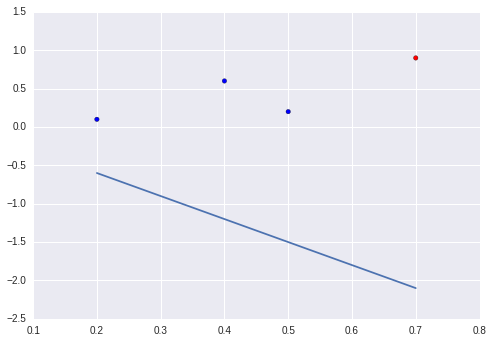

In [2]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets


class Perceptron:
    def __init__(self,ts,tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
    def classify(self,x):
        return np.sign(np.dot(x,self.weights))
    
    def learn(self, limit = 10000):
        done = False
        count = 0
        
        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []
            #first classify all points
            for ix, i in enumerate(self.training_set):
                if (self.classify(i) == self.classes[ix]):
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)
            if len(self.incorrect) == 0:
                print("Done!", self.weights)
                done = True
            else:
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y*self.classes[self.incorrect[p]]
                print(len(self.incorrect),self.weights)
        self.plot()
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1],self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c = cmap)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope*xvals+intcpt)
p = Perceptron(ts,cls)
interact(p.learn, limit = widgets.widget_int.IntSlider(min = 0, max = 10, step = 1, value = 1))



In [3]:
iris_df = pd.read_csv('../CS420/CS420/iris.csv')
iris_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


49 [-3.6 -2.2 -0.4  0.8]
51 [ 1.9  0.2  3.4  1.9]
49 [-3.3 -3.3  1.9  1.7]
51 [ 3.7 -0.1  6.6  3.1]
49 [-1.  -3.3  5.3  2.9]
Done! [-1.  -3.3  5.3  2.9]


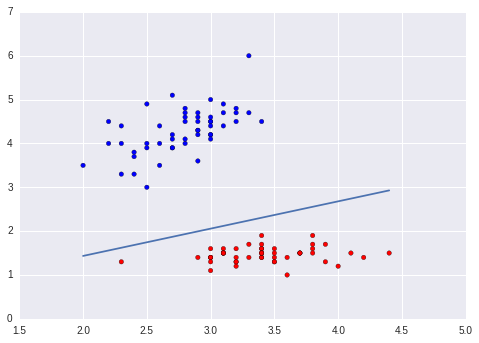

In [4]:
#setosa and versicolor
iris_setosa_versi= iris_df.iloc[0:100,[0,1,2,3]].values
#iris_setosa_versi
setosa_versi_spe = iris_df.iloc[0:100,4].values
setosa_versi_spe = np.where(setosa_versi_spe == 'Iris-setosa', -1, 1) #red == setosa and blue is versicolor
#print(setosa_versi_spe)
P1 = Perceptron(iris_setosa_versi, setosa_versi_spe)
P1.learn()


48 [-4.7 -1.8 -3.5 -0.3]
50 [ 2.2  1.3  1.9  1.8]
48 [-3.3 -1.3 -2.5  0.6]
50 [ 4.4  1.3  4.4  2.9]
48 [-1.9 -1.2 -0.5  1.4]
50 [ 4.5  2.   4.8  3.7]
48 [-1.  -0.6  0.4  2.5]
48 [ 5.7  2.4  5.6  4.8]
48 [  8.88178420e-16  -5.00000000e-01   1.40000000e+00   3.50000000e+00]
48 [-5.2 -3.2 -2.5  2.1]
50 [ 1.   0.2  2.9  4.4]
48 [-4.7 -2.6 -1.6  3.1]
50 [ 1.6  0.2  3.5  4.6]
48 [-4.4 -2.7 -1.   3.1]
50 [  1.40000000e+00   4.44089210e-16   4.10000000e+00   5.00000000e+00]
48 [-4.4 -2.6  0.1  3.8]
50 [ 1.4  0.1  5.2  5.7]
48 [-5.3 -2.9  0.2  4. ]
50 [ 1.1  0.3  5.5  6.3]
48 [-5.7 -2.5  0.7  4.9]
50 [ 0.4  0.5  5.6  6.7]
48 [-6.4 -2.3  0.8  5.3]
50 [ 0.4  0.9  6.7  7.6]
48 [-4.7 -1.6  3.7  6.5]
39 [ 2.   1.4  8.9  8.8]
48 [-4.2 -0.8  4.4  7.3]
31 [-10.1  -4.   -0.4   5.5]
50 [-3.7 -1.2  5.2  7.7]
48 [-9.4 -4.2  1.   6.5]
50 [-2.3 -1.2  6.9  8.6]
48 [-7.9 -4.2  2.8  7.3]
50 [-2.1 -1.5  7.9  9.2]
48 [-7.7 -4.5  3.4  7.7]
50 [-1.3 -1.8  8.7  9.6]
48 [-6.5 -4.5  4.8  8.2]
50 [  1.77635684e-15  -1.

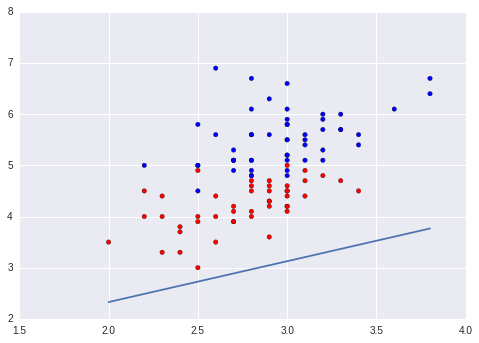

In [5]:
#versicolor and virginica
iris_versi_virgi= iris_df.iloc[51:150,[0,1,2,3]].values
#iris_versi_virgi
versi_virgi_spe = iris_df.iloc[51:150,4].values
versi_virgi_spe = np.where(versi_virgi_spe == 'Iris-versicolor',-1, 1) #red == versicolor and blue is virgi
#print(versi_virgi_spe)
P2 = Perceptron(iris_versi_virgi,versi_virgi_spe)
P2.learn()

In [6]:
traindata = iris_df.sample(120)
#traincats = iris_df.iloc[traindata.index,4]
#print(traindata)
testdata = iris_df.drop(traindata.index)
#print(type(traindata))
#print(type(testdata))


39 [-4.  -2.6 -0.4  0.8]
81 [ 2.   0.1  4.7  2.4]
39 [-2.4 -2.8  3.3  2.2]
75 [ 3.9  0.1  8.9  4. ]
39 [-1.5 -3.6  7.4  3.8]
Done! [-1.5 -3.6  7.4  3.8]


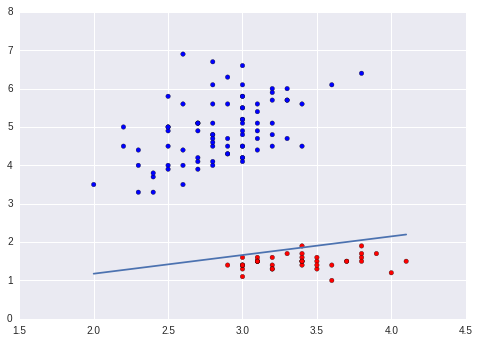

In [7]:
#setosa and versicolor
iris_subset= traindata.iloc[0:120,[0,1,2,3]].values
#print(iris_subset)
iris_subset_spe = traindata.iloc[0:120,4].values
iris_subset_spe = np.where(iris_subset_spe == 'Iris-setosa', -1, 1) #red == setosa and blue is versicolor
#print(iris_subset_spe)
P1 = Perceptron(iris_subset, iris_subset_spe)
P1.learn()

40 [-4.9 -2.  -3.2 -0.5]
80 [ 0.1  1.  -1.6 -0.3]
41 [ 6.6  4.   3.6  1.7]
40 [ 1.1  1.6 -0.2  0.6]
40 [-4.9 -1.8 -4.7 -1. ]
80 [ 0.   1.3 -3.2 -0.9]
74 [ 7.2  4.3  2.6  0.7]
40 [ 1.5  1.5 -1.5 -0.6]
40 [-4.  -1.1 -5.9 -1.8]
80 [ 3.7  1.5  1.   0.5]
40 [-1.5 -1.2 -2.9 -0.9]
80 [ 4.2  2.6 -1.2 -0.6]
40 [-2.2 -0.6 -5.7 -2.1]
80 [ 3.7  2.4 -0.6 -0.3]
40 [-1.8 -0.2 -5.  -1.5]
80 [ 3.6  3.5 -3.5 -1.3]
40 [-2.9  0.7 -8.1 -2.8]
80 [ 1.7  3.8 -6.6 -2.6]
41 [ 8.1  6.6 -1.  -0.5]
40 [ 2.6  4.1 -5.  -1.8]
72 [-2.6  1.4 -8.9 -3.2]
80 [ 2.5  5.2 -7.3 -3. ]
41 [ 8.8  7.9 -2.4 -1.2]
40 [ 2.7  5.1 -6.4 -2.5]
60 [ 9.4  8.1 -1.2 -0.2]
40 [ 3.8  5.1 -5.3 -1.5]
40 [-1.6  2.1 -9.8 -3. ]
80 [ 4.9  5.3 -4.7 -1. ]
40 [-1.6  2.5 -9.3 -2.5]
80 [ 3.5  5.8 -7.6 -2. ]
69 [ -2.3   3.1 -11.7  -3. ]
80 [  3.    6.8 -10.2  -2.8]
41 [  9.8  10.   -4.3  -0.5]
40 [ 4.   7.4 -8.3 -1.7]
64 [ 11.2  10.6  -2.3   0.1]
40 [ 4.4  7.8 -7.1 -1.3]
40 [ -1.9   5.3 -12.   -2.8]
80 [ 3.9  8.  -6.9 -0.9]
40 [ -1.1   5.7 -10.2  -1.9]
7

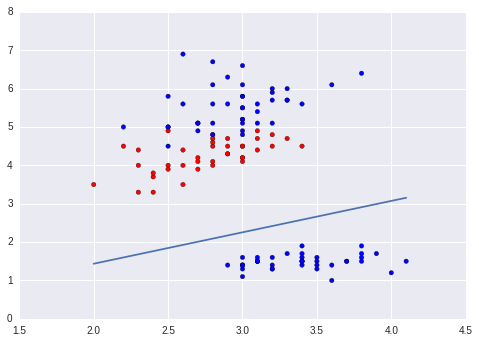

In [8]:
#setosa and versicolor
iris_subset= traindata.iloc[0:120,[0,1,2,3]].values
#iris_setosa_versi
iris_subset_spe = traindata.iloc[0:120,4].values
iris_subset_spe = np.where(iris_subset_spe == 'Iris-versicolor', -1, 1) #red == versicolor and blue is virginica
#print(setosa_versi_spe)
P2 = Perceptron(iris_subset, iris_subset_spe)
P2.learn()

In [9]:
def classify2(val):
    if (P1.classify(val) == -1):
        return "Iris-setosa"
    elif (P2.classify == -1):
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

In [10]:

#print(type(testdata))
incorrect = 0
correct = 0
for idx, row_val in testdata.iterrows():
    c = classify2(row_val.values[0:4])
    if(c == row_val.values[4]):
        #print(c,row_val.values[4])
        correct += 1
    else:
        incorrect += 1
print("Correct: ", correct)
print("Incorrect: ",incorrect)

Correct:  19
Incorrect:  10


In [61]:
#using Perceptron
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
#iris
print("Keys = ", iris.keys())
x,y = iris.data, iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y)

#create the model
sss = Perceptron() #n_iter 

#fit the model
sss.fit(Xtrain,ytrain)

#what kind of iris has cm * 5 cm
result =  sss.predict([[3,5,4,2],[2,4,5,3]])
print("Predicted result: ", result)
print("Predicted iris name: ",iris.target_names[result])

ypred = sss.predict(Xtest)
print(classification_report(ytest,ypred,target_names = iris.target_names))




Keys =  dict_keys(['DESCR', 'feature_names', 'target', 'data', 'target_names'])
Predicted result:  [2 2]
Predicted iris name:  ['virginica' 'virginica']
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.73      1.00      0.84        16
  virginica       1.00      0.40      0.57        10

avg / total       0.89      0.84      0.82        38



In [62]:
#Using SVM
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [66]:
iris= datasets.load_iris()
print("Keys: ", iris.keys())
x, y = iris.data, iris.target

Xtrain, Xtest, Ctrain, Ctest = train_test_split(x,y)


Keys:  dict_keys(['DESCR', 'feature_names', 'target', 'data', 'target_names'])


In [67]:
classifier = SVC()
classifier.fit(Xtrain, Ctrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
Cpred= classifier.predict(Xtest)
print(classification_report(Ctest,Cpred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.92      0.96        12
          2       0.93      1.00      0.96        13

avg / total       0.98      0.97      0.97        38



In [ ]:
#Observation: Support Vector Classifier does much better job in classification than Perceptron